# Midterm Activity: Report on Data Exploration Techniques

In this activity, you will explore a dataset of your choice using basic descriptive statistics techniques with your group. The goal is to understand the characteristics of the dataset, such as central tendency and variability, using Python libraries like scipy or similar.

1. Selecting a Dataset:
- Find a dataset that interests your group. You can use publicly available datasets from platforms like Kaggle, UCI Machine Learning Repository, or any other open data source.
- Ensure the dataset has multiple numerical variables so you can effectively apply descriptive statistics.
If you have any questions, consult with me regarding your dataset.

2. Setting Up the Environment:
- Use a Jupyter notebook to conduct your analysis.
- Ensure that your Python environment has the necessary libraries installed, including:
    - pandas (for data manipulation)
    - numpy (for numerical operations)
    - scipy.stats (for statistical functions)
    - matplotlib or seaborn (for visualizing data)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

3. Data Exploration:
- Load the dataset into your Jupyter notebook using pandas.
- Clean the data by handling missing values or outliers as needed. You may choose to remove, fill, or impute missing data.
- Check for data types and structure using commands like df.info() and df.describe().

In [3]:
df = pd.read_csv('PowerGeneration.csv')
print(df.head())
for column in df.columns[1:]:  
    df[column] = df[column].replace(',', '', regex=True).astype(float)
print(df.info())

   Years Biomass   Coal Geothermal  Hydro Natural Gas Oil-based Solar Wind  \
0   1990       0  1,934      5,466  6,062           0    12,434     0    0   
1   1991       0  1,942      5,758  5,145           0    12,804     0    0   
2   1992       0  1,791      5,700  4,440           0    13,939     0    0   
3   1993       0  2,015      5,667  5,030           0    13,867     0    0   
4   1994       0  1,348      6,320  5,862           0    16,929     0    0   

  Grand Total  
0      25,896  
1      25,649  
2      25,870  
3      26,579  
4      30,459  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Years        31 non-null     int64  
 1   Biomass      31 non-null     float64
 2   Coal         31 non-null     float64
 3   Geothermal   31 non-null     float64
 4   Hydro        31 non-null     float64
 5   Natural Gas  31 non-null     floa

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

df.fillna(0, inplace=True)  # Fill missing values with 0

Years          0
Biomass        0
Coal           0
Geothermal     0
Hydro          0
Natural Gas    0
Oil-based      0
Solar          0
Wind           0
Grand Total    0
dtype: int64


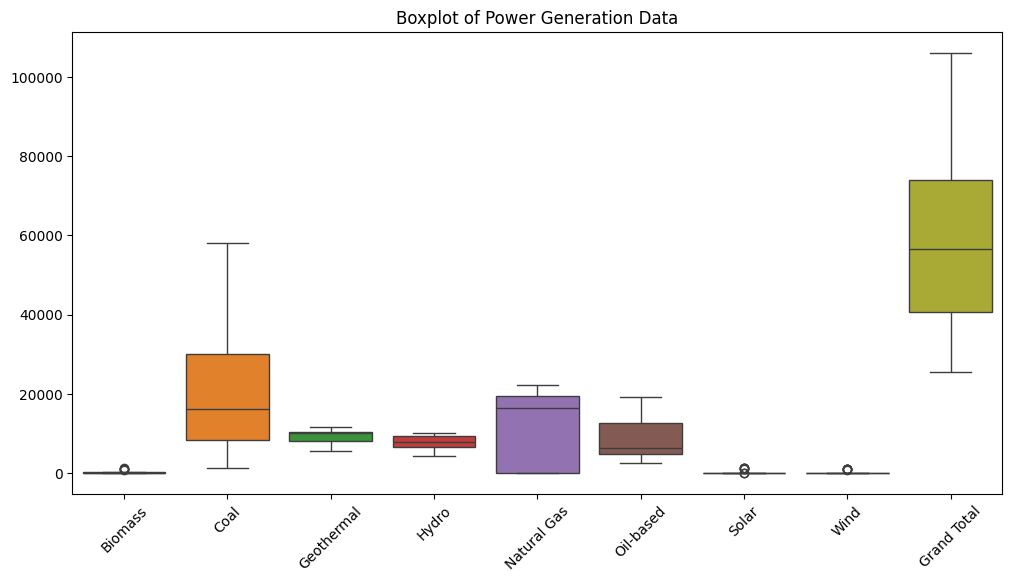

In [5]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Years', axis=1))  # Drop 'Years' for the plot
plt.xticks(rotation=45)
plt.title('Boxplot of Power Generation Data')
plt.show()

In [6]:
# Summary statistics
summary = df.describe()
print(summary)

             Years      Biomass          Coal    Geothermal         Hydro  \
count    31.000000    31.000000     31.000000     31.000000     31.000000   
mean   2005.000000   201.903226  20746.161290   9247.387097   7793.870968   
std       9.092121   385.052668  16901.184598   1963.802734   1682.535344   
min    1990.000000     0.000000   1348.000000   5466.000000   4440.000000   
25%    1997.500000     0.000000   8375.500000   8075.500000   6631.000000   
50%    2005.000000     0.000000  16194.000000  10242.000000   7870.000000   
75%    2012.500000   189.500000  30173.000000  10453.500000   9260.500000   
max    2020.000000  1261.000000  58176.000000  11626.000000  10252.000000   

        Natural Gas     Oil-based        Solar         Wind    Grand Total  
count     31.000000     31.000000    31.000000    31.000000      31.000000  
mean   11173.612903   8816.967742   204.258065   217.225806   58401.548387  
std     9341.784643   5300.290775   460.786138   398.788474   24001.126126 

In [7]:

# Mean, median, mode
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # Get the first mode if there are multiple

# Standard deviation and variance
std_dev = df.std()
variance = df.var()

# Min, max, and range
min_values = df.min()
max_values = df.max()
range_values = max_values - min_values

# Percentiles
percentiles = df.quantile([0.25, 0.5, 0.75])

# Print results
print("Mean:\n", mean_values)
print("Median:\n", median_values)
print("Mode:\n", mode_values)
print("Standard Deviation:\n", std_dev)
print("Variance:\n", variance)
print("Min Values:\n", min_values)
print("Max Values:\n", max_values)
print("Range:\n", range_values)
print("Percentiles:\n", percentiles)


Mean:
 Years           2005.000000
Biomass          201.903226
Coal           20746.161290
Geothermal      9247.387097
Hydro           7793.870968
Natural Gas    11173.612903
Oil-based       8816.967742
Solar            204.258065
Wind             217.225806
Grand Total    58401.548387
dtype: float64
Median:
 Years           2005.0
Biomass            0.0
Coal           16194.0
Geothermal     10242.0
Hydro           7870.0
Natural Gas    16366.0
Oil-based       6293.0
Solar              1.0
Wind              17.0
Grand Total    56568.0
dtype: float64
Mode:
 Years           1990.0
Biomass            0.0
Coal            1348.0
Geothermal      5466.0
Hydro           4440.0
Natural Gas        0.0
Oil-based       2474.0
Solar              0.0
Wind               0.0
Grand Total    25649.0
Name: 0, dtype: float64
Standard Deviation:
 Years              9.092121
Biomass          385.052668
Coal           16901.184598
Geothermal      1963.802734
Hydro           1682.535344
Natural Gas     9341.7

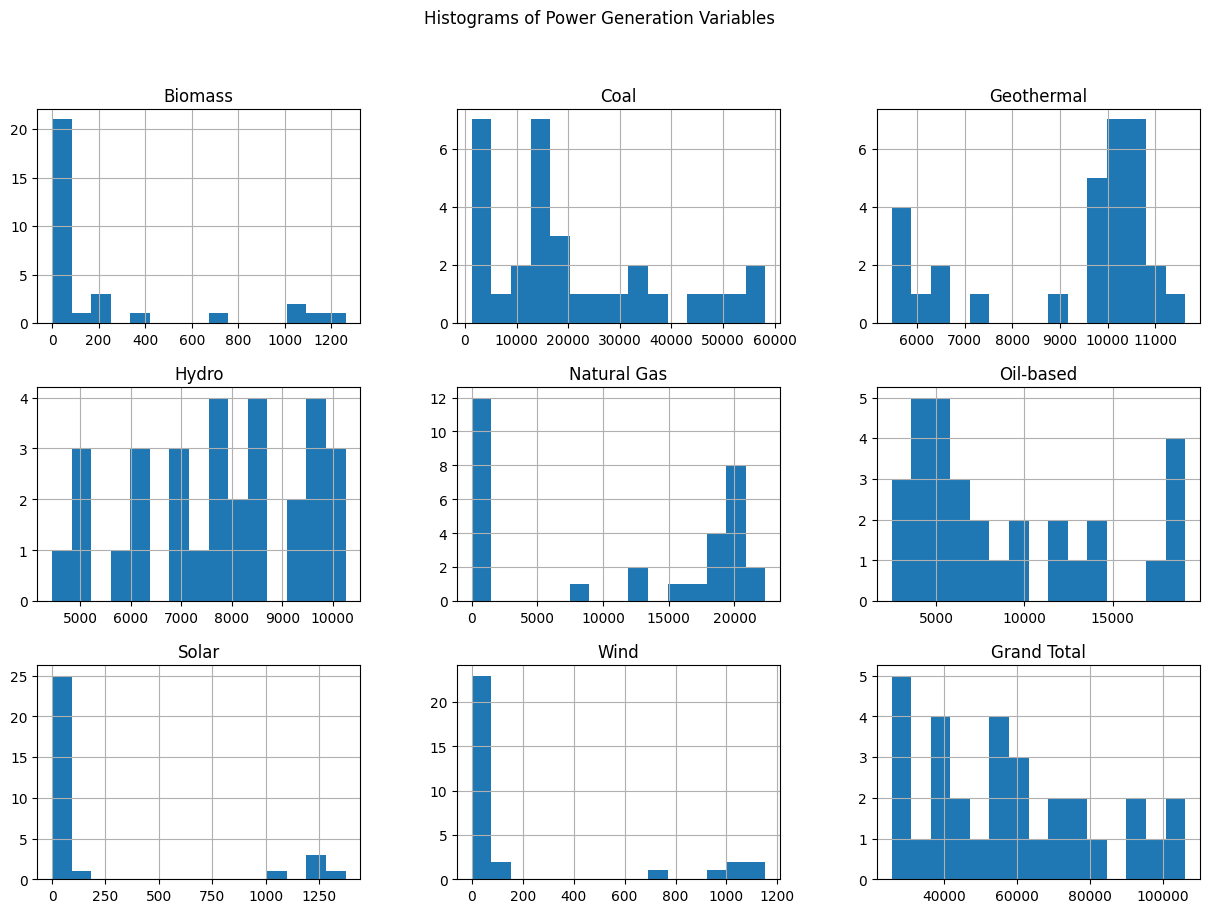

In [8]:
#VISUAL REPRESENTATIONS
# Histograms for numerical variables
df.drop('Years', axis=1).hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Power Generation Variables')
plt.show()

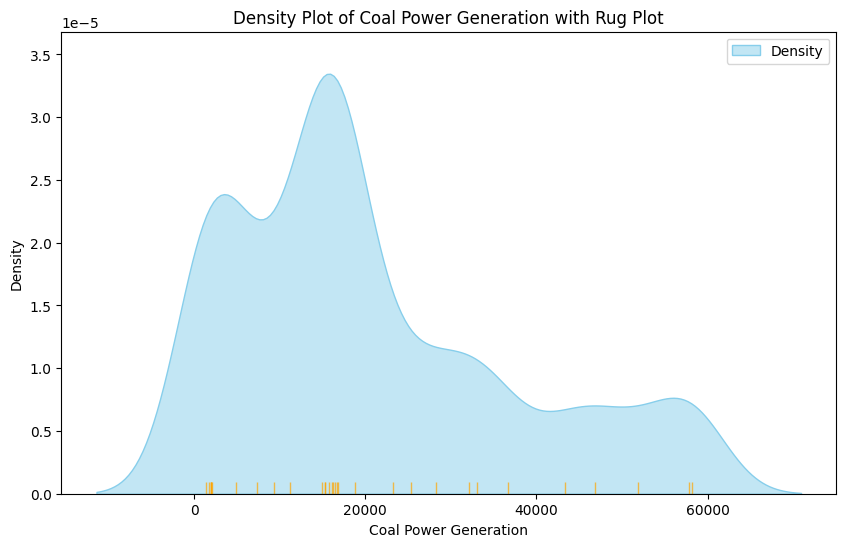

In [11]:
# Clean the data by removing commas and converting to numeric

for column in df.columns[1:]:
    df[column] = df[column].replace(',', '', regex=True).astype(float)

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the density plot with rug for the 'Coal' column as an example
sns.kdeplot(data=df, x='Coal', fill=True, color='skyblue', alpha=0.5, bw_adjust=0.5, label='Density')
sns.rugplot(data=df, x='Coal', color='orange', alpha=0.7)

# Add labels and title
plt.title('Density Plot of Coal Power Generation with Rug Plot')
plt.xlabel('Coal Power Generation')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

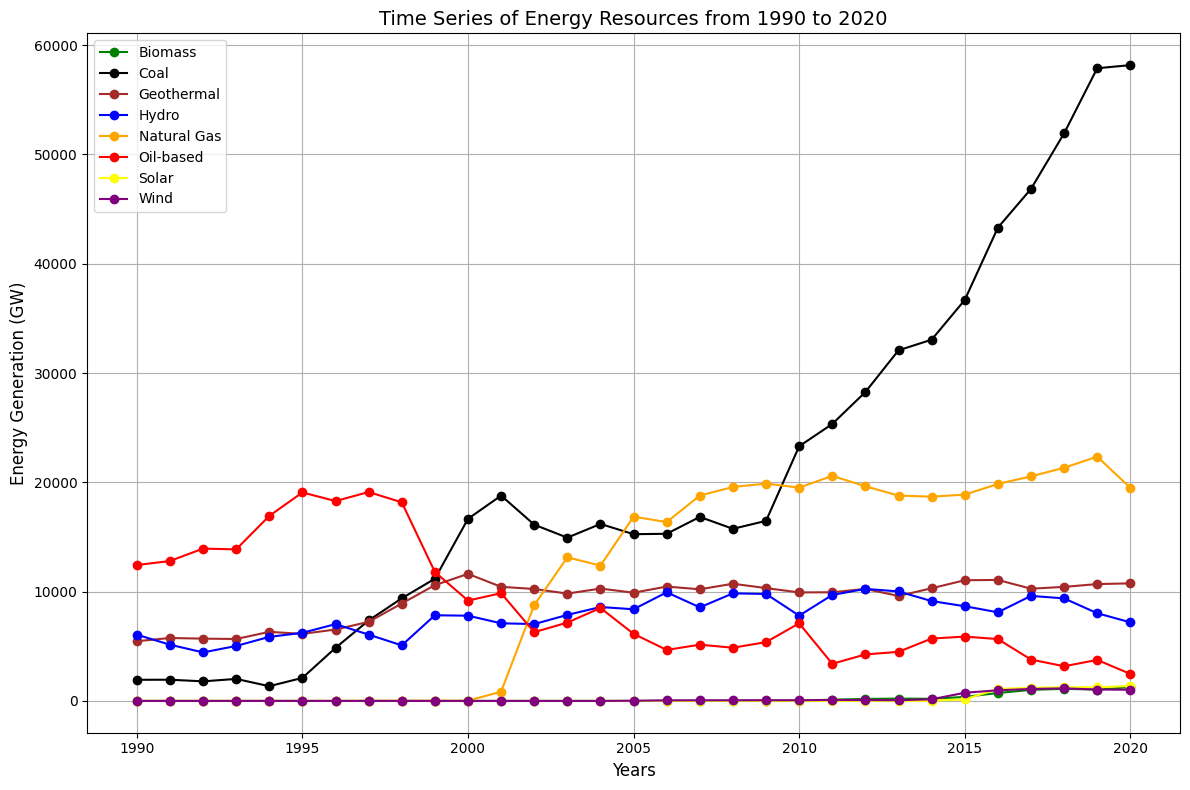

In [23]:
#Time Series visual representation of the Energy Resources Generation
for column in df.columns[1:]:
    df[column] = df[column].replace(',', '', regex=True).astype(float)
plt.figure(figsize=(12, 8))

plt.plot(df['Years'], df['Biomass'], label='Biomass', color='green', marker='o')
plt.plot(df['Years'], df['Coal'], label='Coal', color='black', marker='o')
plt.plot(df['Years'], df['Geothermal'], label='Geothermal', color='brown', marker='o')
plt.plot(df['Years'], df['Hydro'], label='Hydro', color='blue', marker='o')
plt.plot(df['Years'], df['Natural Gas'], label='Natural Gas', color='orange', marker='o')
plt.plot(df['Years'], df['Oil-based'], label='Oil-based', color='red', marker='o')
plt.plot(df['Years'], df['Solar'], label='Solar', color='yellow', marker='o')
plt.plot(df['Years'], df['Wind'], label='Wind', color='purple', marker='o')

plt.title('Time Series of Energy Resources from 1990 to 2020', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Energy Generation (GW)', fontsize=12)

plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


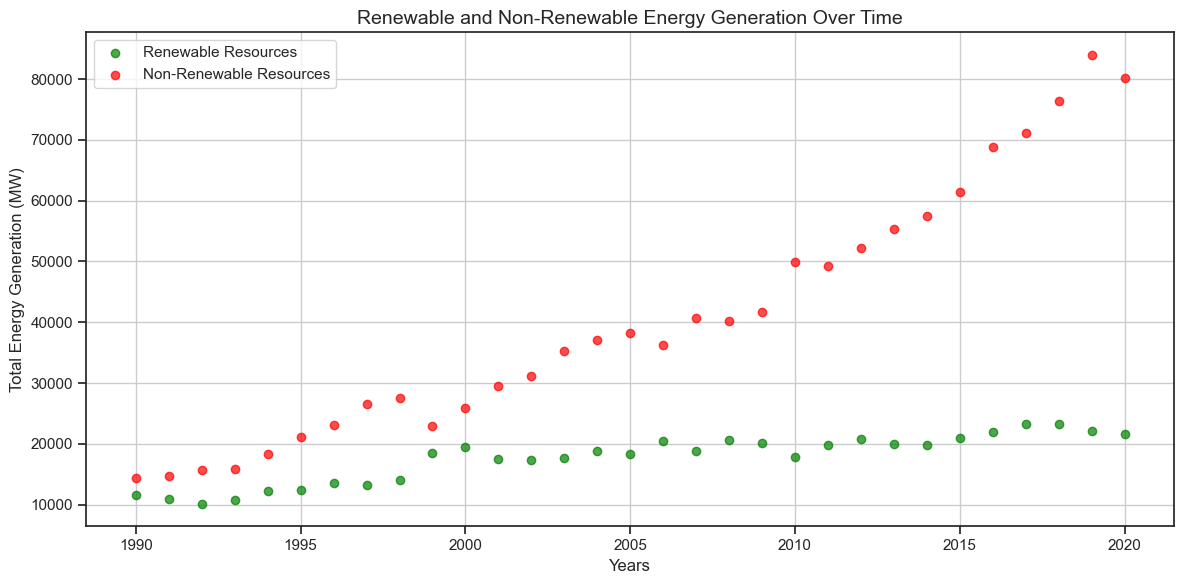

In [29]:
#Pairwise Plot with Classes for Renewable and Non-Renewable Resources
for column in df.columns[1:]:
    df[column] = df[column].replace(',', '', regex=True).astype(float)

renewable_columns = ['Biomass', 'Geothermal', 'Hydro', 'Solar', 'Wind']
non_renewable_columns = ['Coal', 'Natural Gas', 'Oil-based']

df['Renewable Total'] = df[renewable_columns].sum(axis=1)
df['Non-Renewable Total'] = df[non_renewable_columns].sum(axis=1)

plt.figure(figsize=(12, 6))

plt.scatter(df['Years'], df['Renewable Total'], color='green', label='Renewable Resources', marker='o', alpha=0.7)

plt.scatter(df['Years'], df['Non-Renewable Total'], color='red', label='Non-Renewable Resources', marker='o', alpha=0.7)

plt.title('Renewable and Non-Renewable Energy Generation Over Time', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Total Energy Generation (MW)', fontsize=12)

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


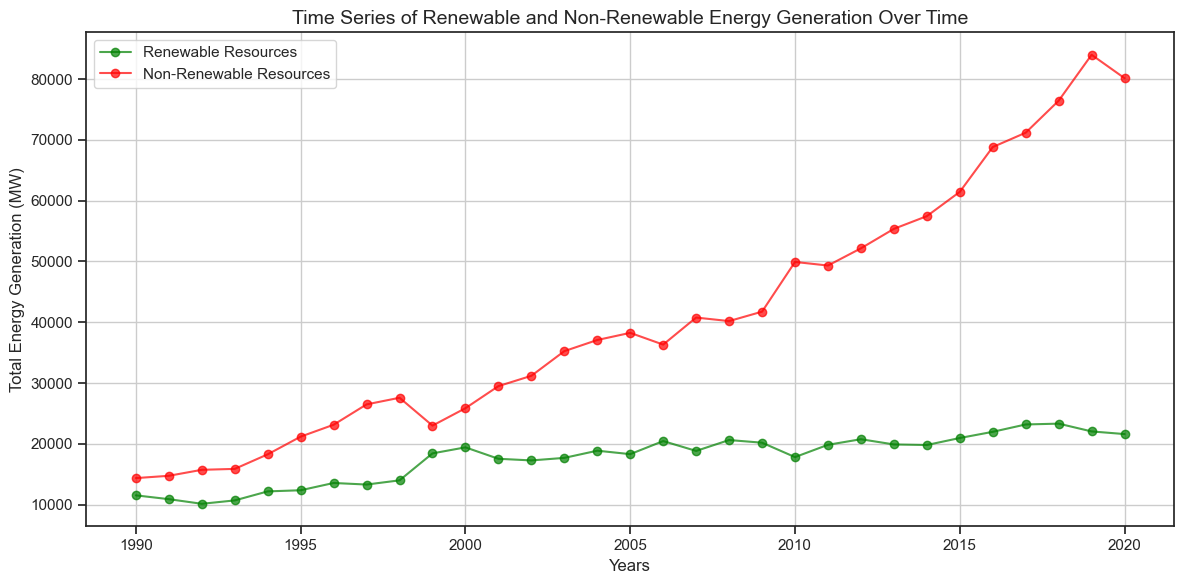

In [30]:
#Time Series for the Energy Generation of Renewable and Non-renewable Resources
for column in df.columns[1:]:
    df[column] = df[column].replace(',', '', regex=True).astype(float)

renewable_columns = ['Biomass', 'Geothermal', 'Hydro', 'Solar', 'Wind']
non_renewable_columns = ['Coal', 'Natural Gas', 'Oil-based']

df['Renewable Total'] = df[renewable_columns].sum(axis=1)
df['Non-Renewable Total'] = df[non_renewable_columns].sum(axis=1)

plt.figure(figsize=(12, 6))

plt.plot(df['Years'], df['Renewable Total'], color='green', label='Renewable Resources', marker='o', linestyle='-', alpha=0.7)

plt.plot(df['Years'], df['Non-Renewable Total'], color='red', label='Non-Renewable Resources', marker='o', linestyle='-', alpha=0.7)

plt.title('Time Series of Renewable and Non-Renewable Energy Generation Over Time', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Total Energy Generation (MW)', fontsize=12)

plt.legend()


plt.grid(True)
plt.tight_layout()

plt.show()
